# Project 4 - Client Problem #1: 
# Leveraging Social Media to Map Disasters
# Mapping the Tweets

### This reads in the tweet location data and displays it on a map of the US.

In [4]:
!pip install geopandas

    100% |████████████████████████████████| 901kB 4.5MB/s ta 0:00:011
    100% |████████████████████████████████| 1.6MB 5.7MB/s ta 0:00:011
    100% |████████████████████████████████| 2.8MB 2.6MB/s ta 0:00:011
    100% |████████████████████████████████| 24.5MB 974kB/s ta 0:00:011
  Running setup.py bdist_wheel for pyproj ... done
  Stored in directory: /Users/patrick/Library/Caches/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
  Running setup.py bdist_wheel for munch ... done
  Stored in directory: /Users/patrick/Library/Caches/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built pyproj munch


In [13]:
!pip install descartes

In [101]:
import json
import pandas as pd
from pprint import pprint
import datetime

import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import descartes

import matplotlib.pyplot as plt

### This reuses some code and explanatory text from the previous DSI Cohort work on the same project:
###  https://github.com/belencito27/Map_Disasters_Twitter

### Read in the US shape file, and set the associated Co-ordinate Reference system crs

In [85]:
usa = gpd.read_file('./MAPS/cb_2017_us_county_20m/cb_2017_us_county_20m.shp')
crs = {'init': 'epsg:4326'}

In [86]:
df = pd.read_json('tweets_df_panama_city_mexico_beach_oct.json')

#df.info()
# Mexico Beach 20 miles was  682 entries
# Panama City 25 miles is 1352 entries

### Convert the date column from string to date time object 

In [87]:
#df.date_utc.astype('datetime64[ns]') 
#pd.to_datetime(df.date_utc)
df.head()

date_utc  \
0  Wed Oct 17 23:21:55 +0000 2018   
1  Wed Oct 17 23:10:52 +0000 2018   
2  Wed Oct 17 20:37:55 +0000 2018   
3  Mon Oct 15 23:18:45 +0000 2018   
4  Mon Oct 15 22:30:43 +0000 2018   

                                           full_text               long_lat  
0  current weather in Panama City: scattered clou...        [-85.66, 30.16]  
1  A resident from #MexicoBeach finds her marriag...  [-85.40839, 29.94124]  
2  My new friend Mr. Harmon of Mexico Beach...a f...  [-85.40839, 29.94124]  
3                        Panama City: 6:10pm: sunset        [-85.66, 30.16]  
4  Katy Pinson comforted Brenda Pulliam, whose ho...  [-85.60471, 30.13108]

### Create a list of Points from the tweet long lat co-ordinates to allow mapping.
### The Point object comes from the Shapely library

In [88]:
tweet_geo_location_points = [Point(long_lat) for long_lat in df.long_lat]

### Overlay the path of Hurricane Michael on the US tweets map

In [ ]:
# Hurricane co-ordinates from NOAA beginning 3am UTC Weds Oct 10, till 3am Thurs, Oct 11, 2018
# These are at 6 hour intervals
27.1N  86.5W
28.3N  86.5W
29.4N  86.0W
30.9N  85.1W
32.1N  83.8W

### Create the line segments making up the path of Hurricane Michael

In [112]:
hurricane_michael_path_1 = LineString([(-86.5, 27.1), (-86.5, 28.3)])
hurricane_michael_path_2 = LineString([(-86.5, 28.3), (-86.0, 29.4)])
hurricane_michael_path_3 = LineString([(-86.0, 29.4), (-85.1, 30.9)])
hurricane_michael_path_4 = LineString([(-85.1, 30.9), (-83.8, 32.1)])

In [113]:
hurricane_path_gdf = gpd.GeoDataFrame(crs=crs, geometry=[hurricane_michael_path_1,
                                                        hurricane_michael_path_2,
                                                        hurricane_michael_path_3,
                                                        hurricane_michael_path_4])

In [ ]:
sampleCircle = Point(1,1).buffer(1)
print sampleCircle.area

### Create the GeoDataFrame using the dataframe, the co-ordinated reference system (crs) and the long/lat points.

In [89]:
tweets_geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=tweet_geo_location_points)
tweets_geo_df.head()

date_utc  \
0  Wed Oct 17 23:21:55 +0000 2018   
1  Wed Oct 17 23:10:52 +0000 2018   
2  Wed Oct 17 20:37:55 +0000 2018   
3  Mon Oct 15 23:18:45 +0000 2018   
4  Mon Oct 15 22:30:43 +0000 2018   

                                           full_text               long_lat  \
0  current weather in Panama City: scattered clou...        [-85.66, 30.16]   
1  A resident from #MexicoBeach finds her marriag...  [-85.40839, 29.94124]   
2  My new friend Mr. Harmon of Mexico Beach...a f...  [-85.40839, 29.94124]   
3                        Panama City: 6:10pm: sunset        [-85.66, 30.16]   
4  Katy Pinson comforted Brenda Pulliam, whose ho...  [-85.60471, 30.13108]   

                     geometry  
0        POINT (-85.66 30.16)  
1  POINT (-85.40839 29.94124)  
2  POINT (-85.40839 29.94124)  
3        POINT (-85.66 30.16)  
4  POINT (-85.60471 30.13108)

### Plot the tweets and the path of Hurricane Michael on a USA shape file at 5 different "Zoom" values

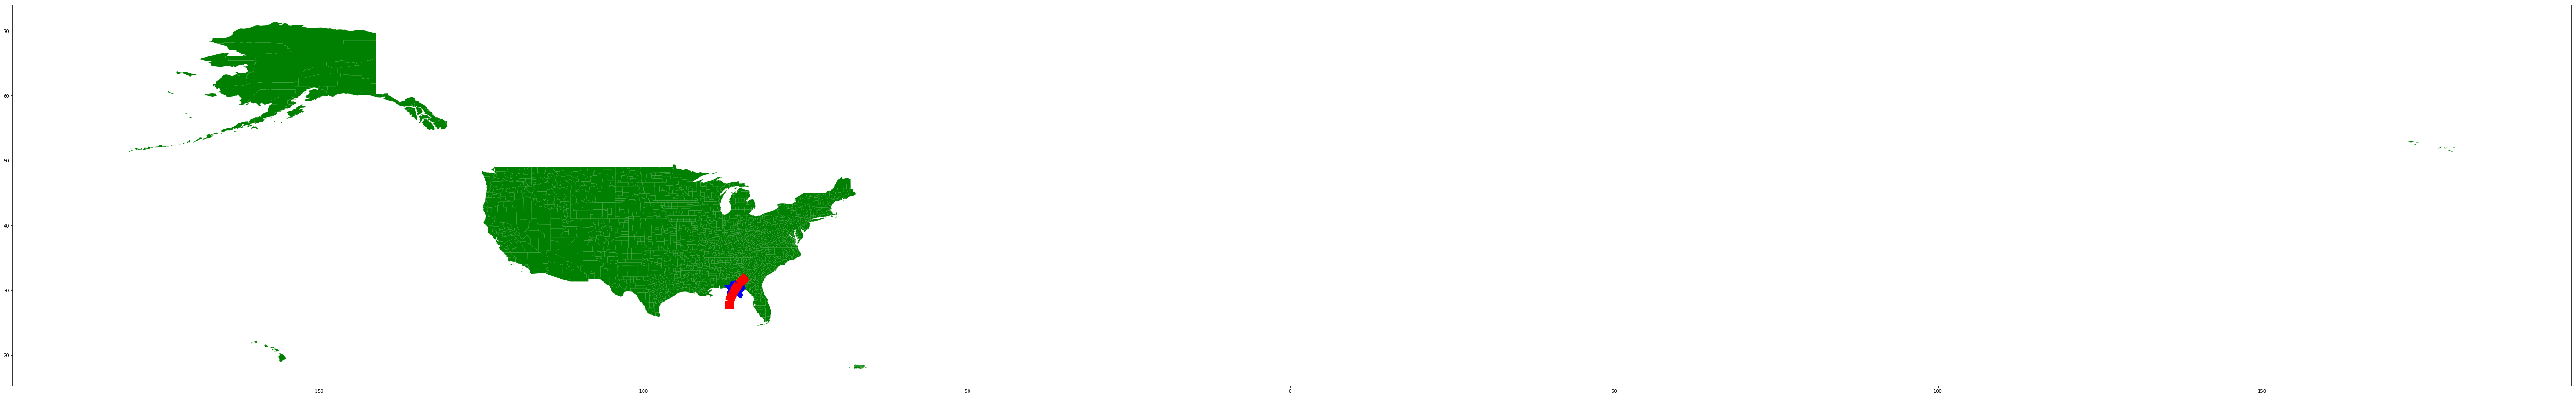

In [131]:
fig, ax = plt.subplots(figsize = (100,100))

#usa.plot(ax = ax, color = 'gray')
usa.plot(ax = ax, color = 'green')

tweets_geo_df.geometry.plot(marker='*', color='blue', markersize=900, 
                            ax=ax, label = 'Tweet Loc')

hurricane_path_gdf.geometry.plot(color='red', ax=ax, label='Hurricane Michael', lw=20)

hurricane_path_gdf.geometry.plot(color='red', ax=ax)

(25, 45)

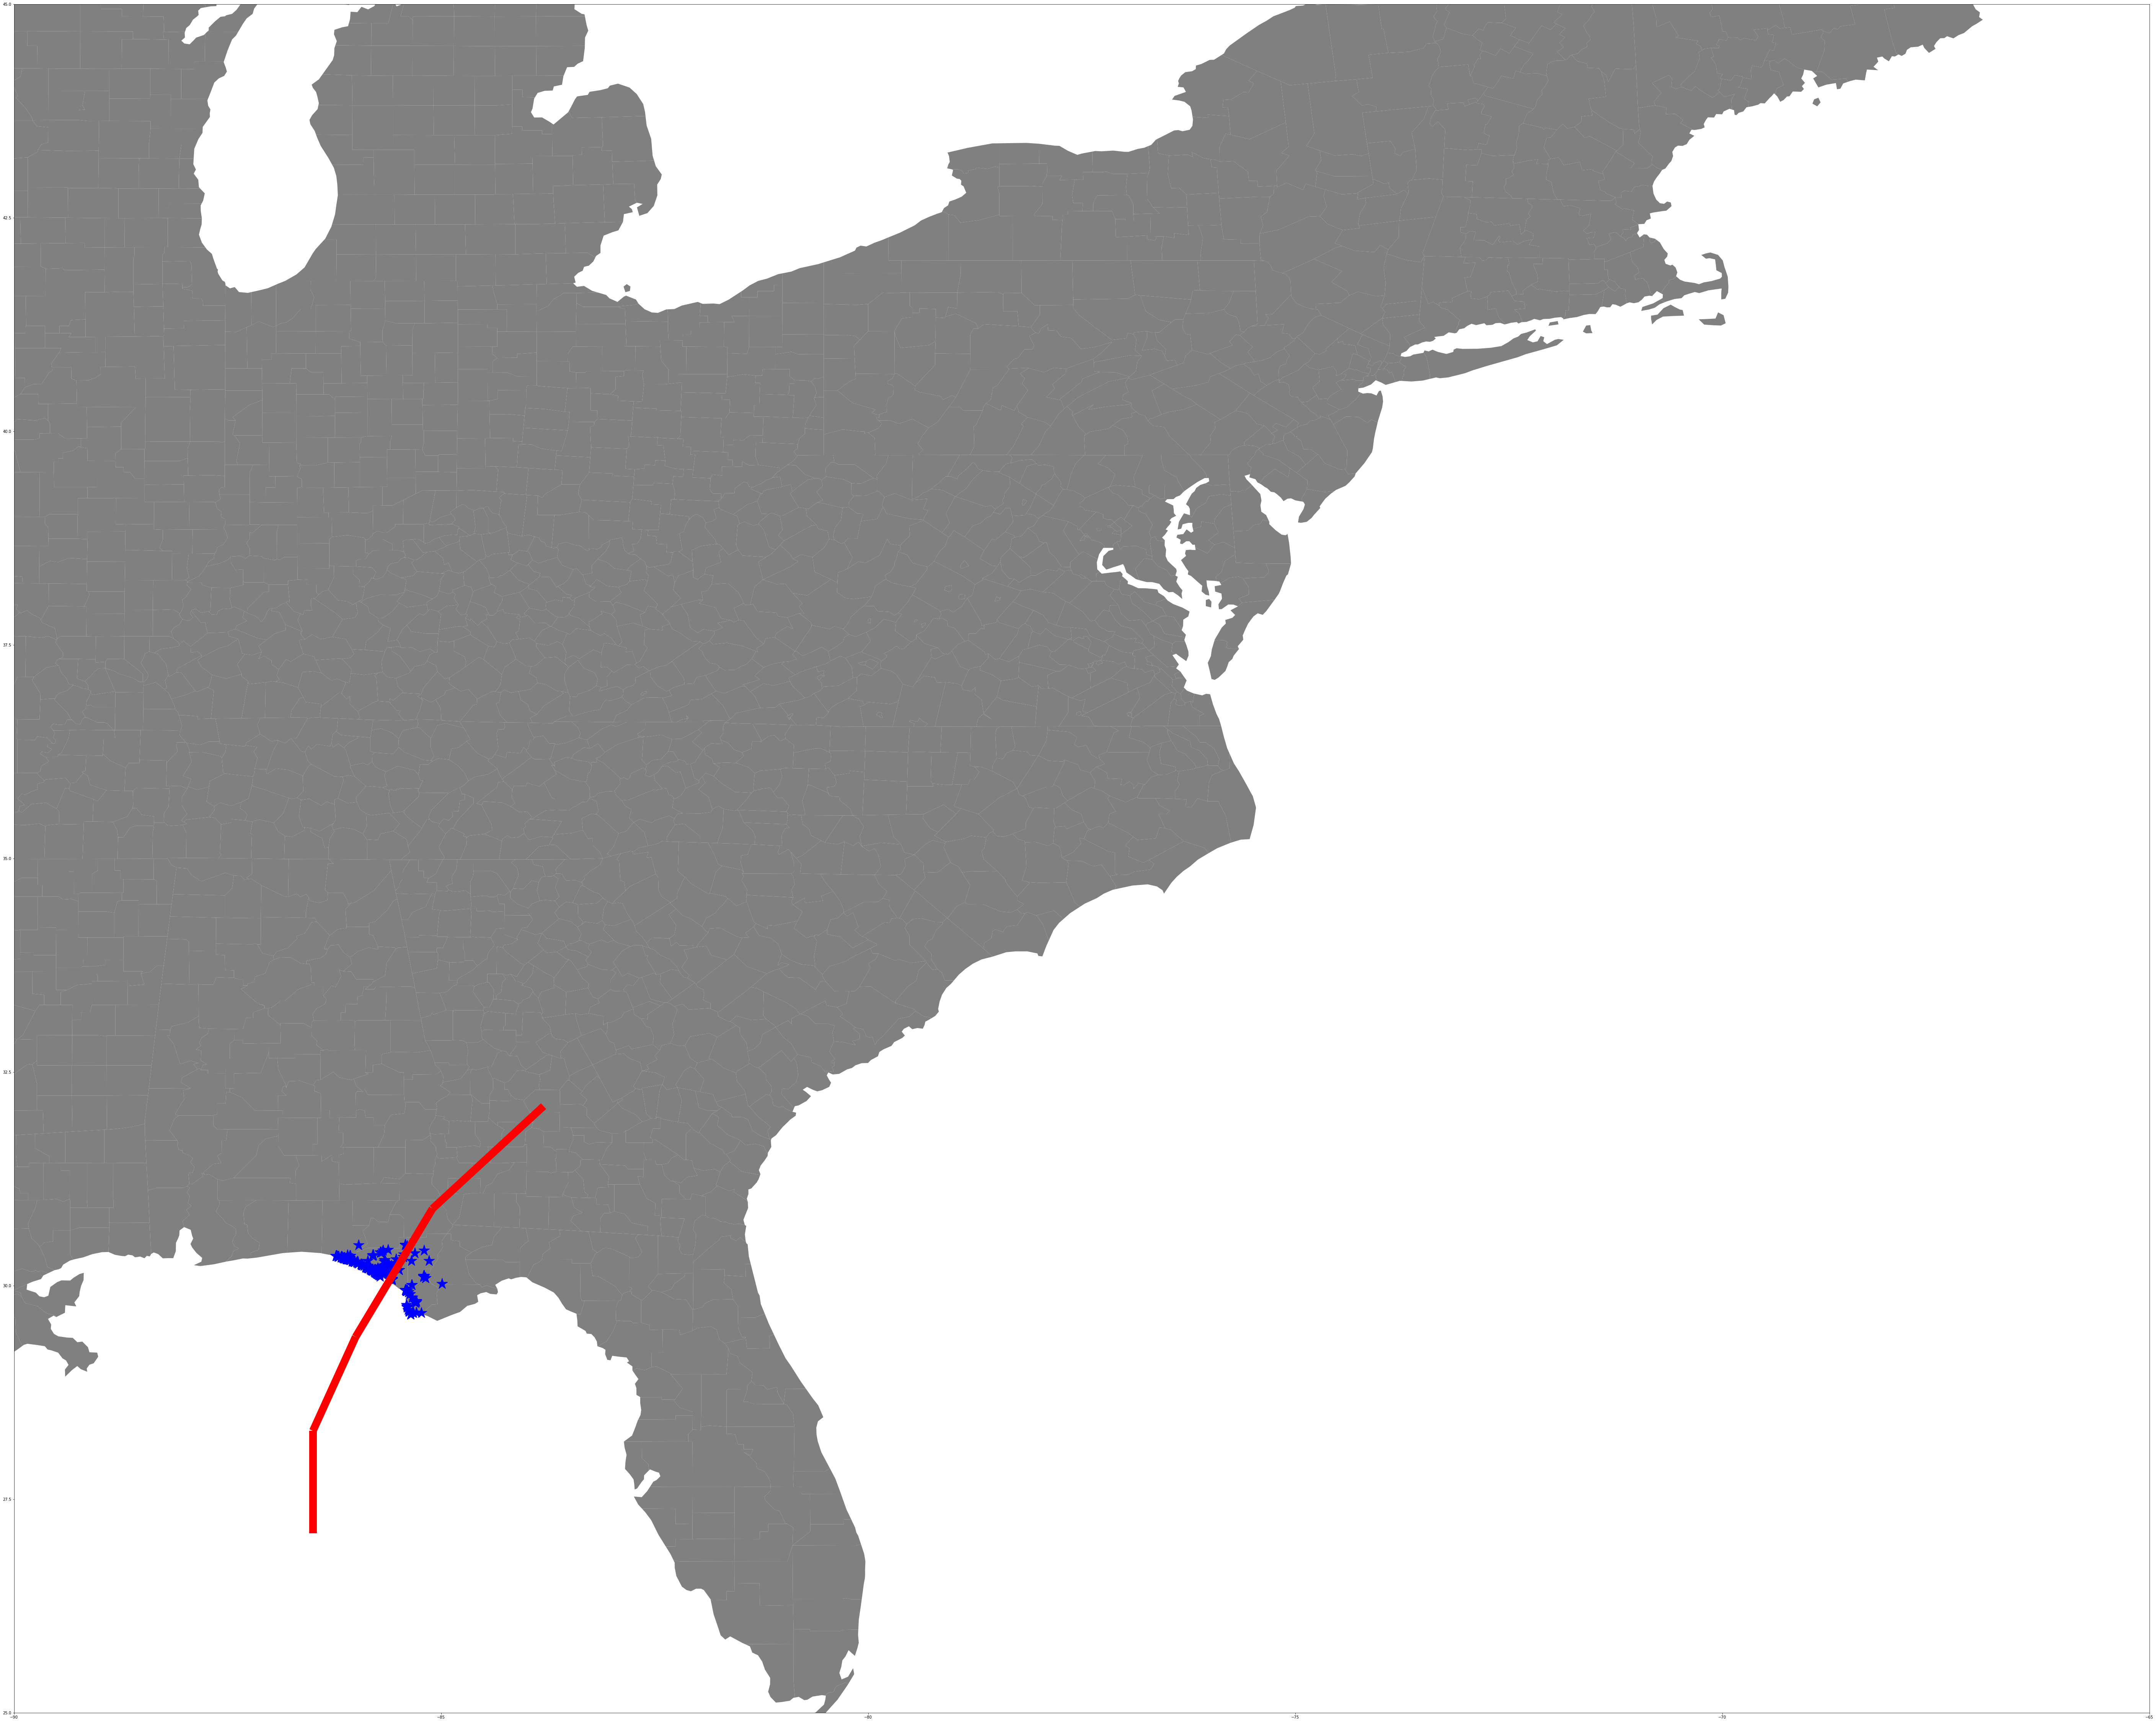

In [129]:
fig, ax = plt.subplots(figsize = (100,100))
usa.plot(ax = ax, color = 'gray') 

tweets_geo_df.geometry.plot(marker='*', color='blue', markersize=900, 
                            ax=ax, label = 'Tweet Loc')

hurricane_path_gdf.geometry.plot(color='red', ax=ax, label='Hurricane Michael', lw=20)

plt.xlim(-90, -65)
plt.ylim(25,45)

(25, 35)

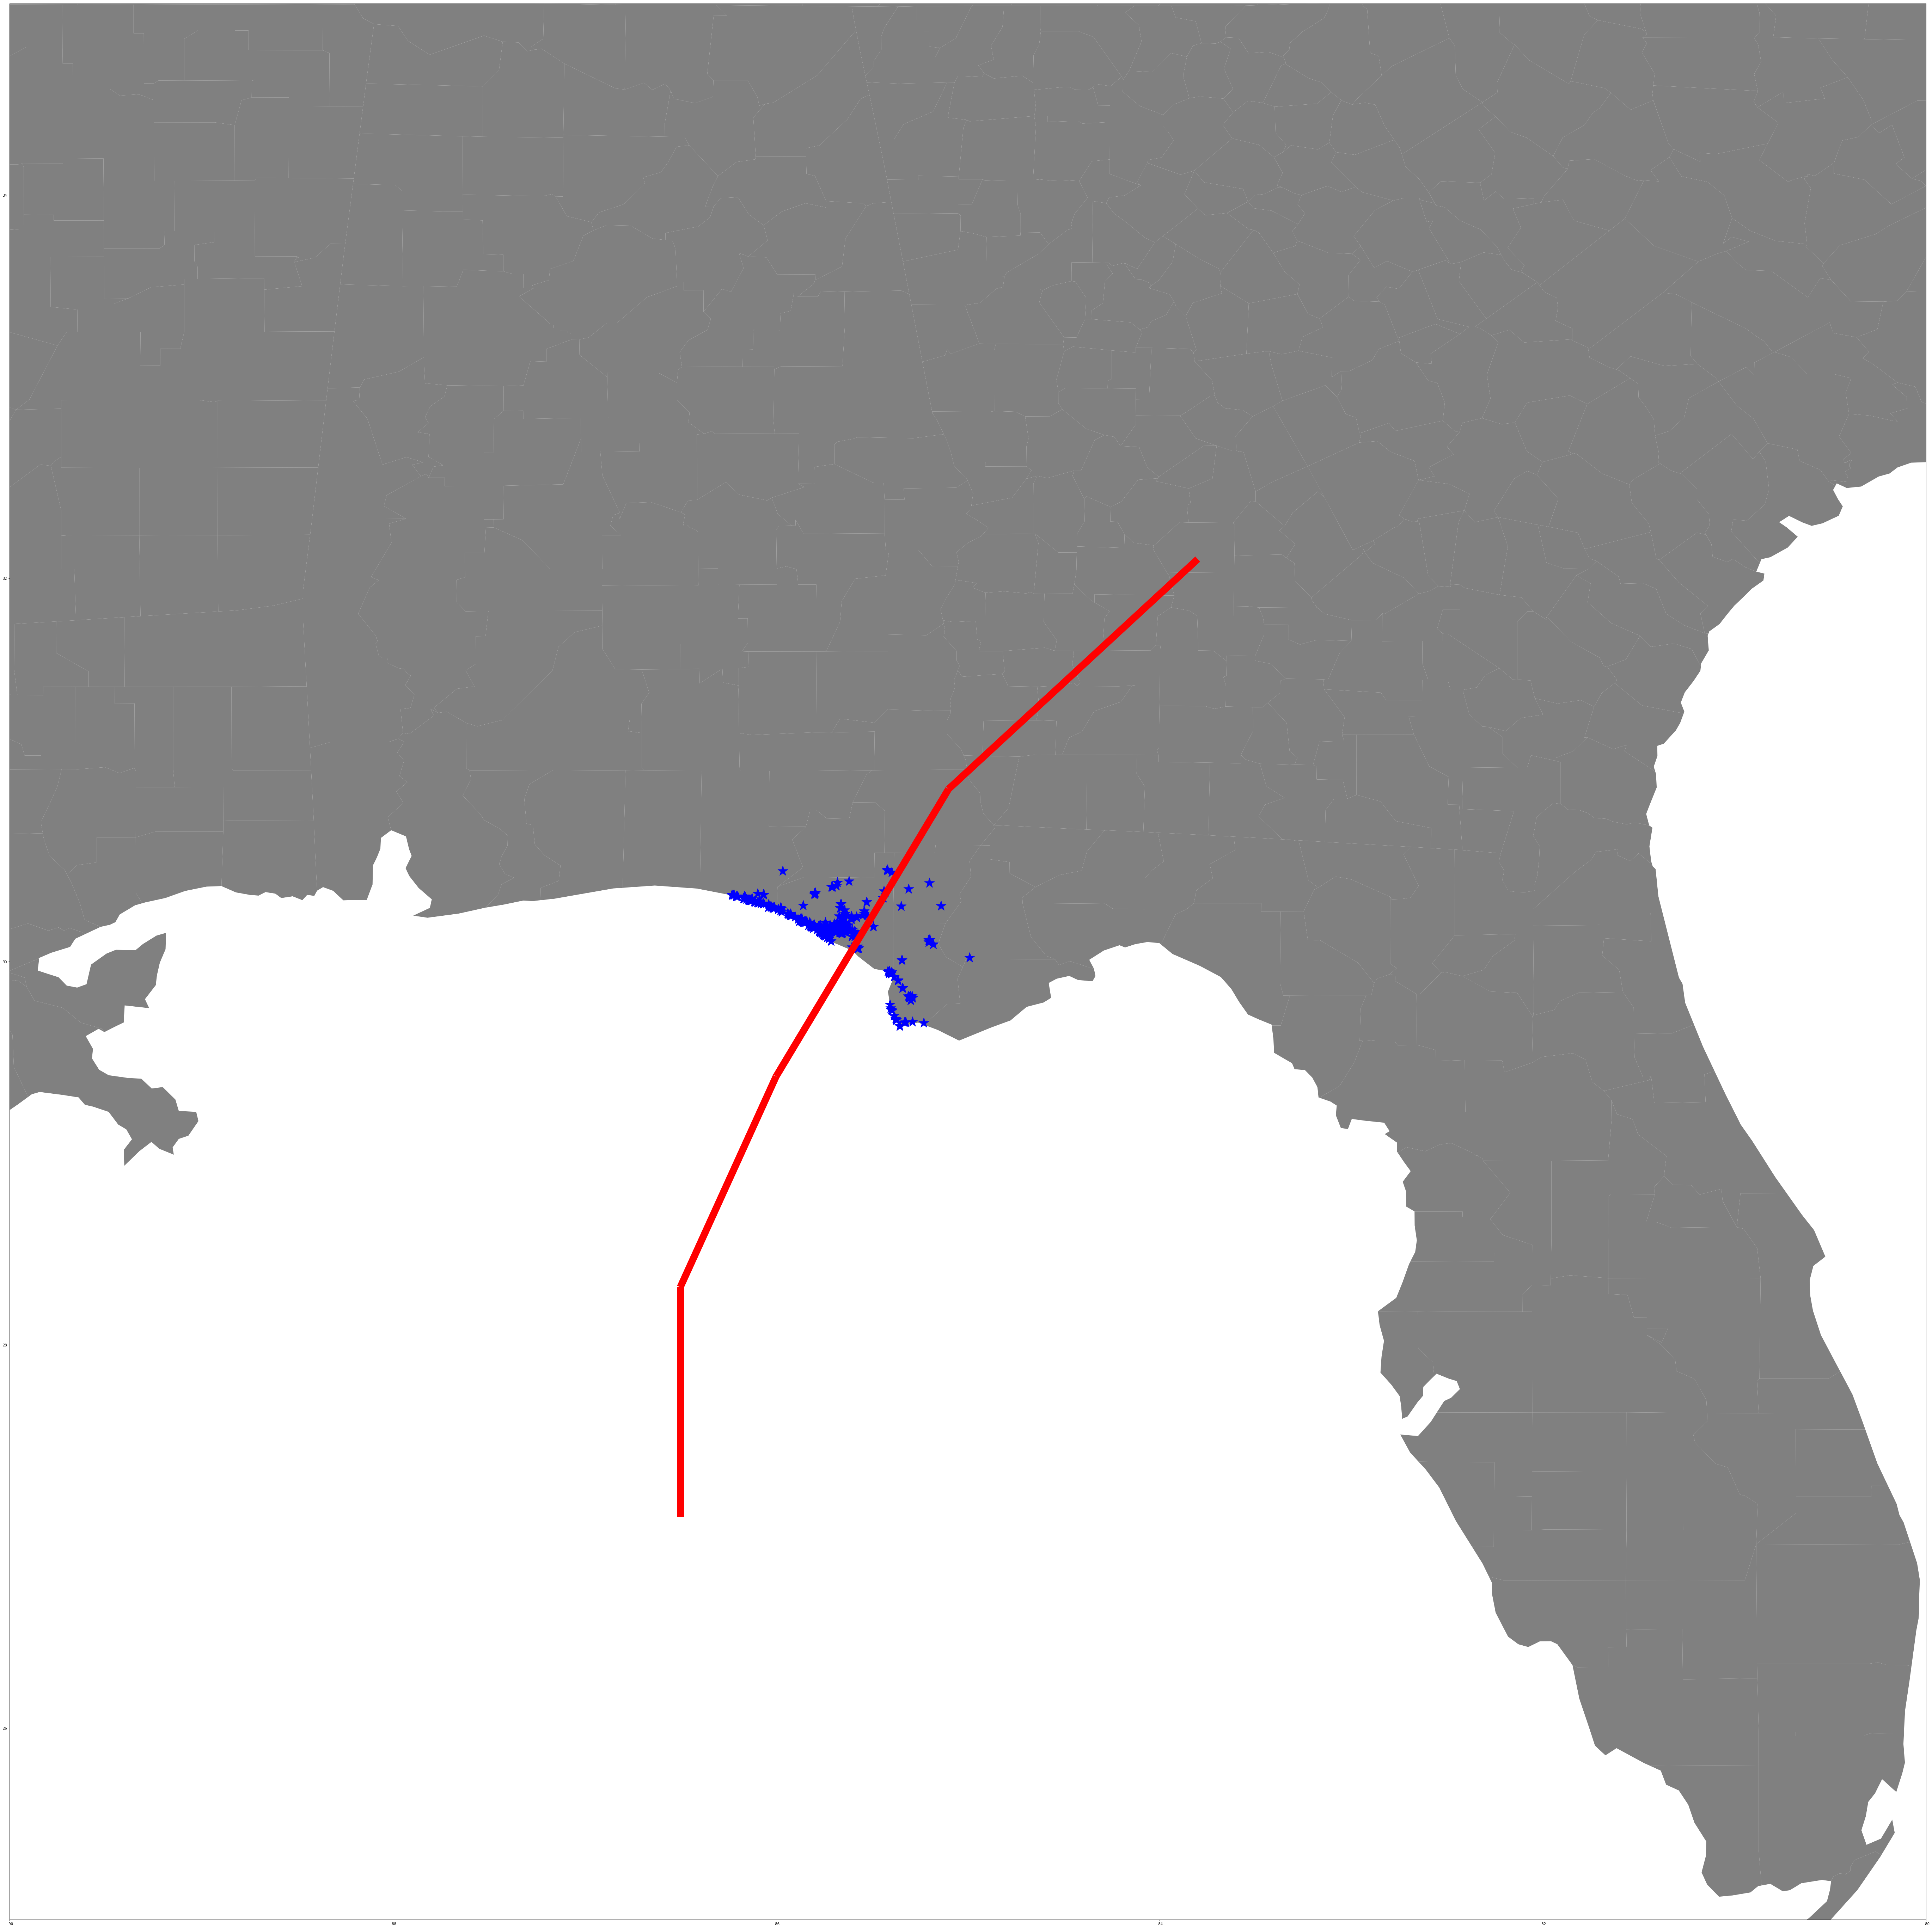

In [126]:
fig, ax = plt.subplots(figsize = (100,100))
usa.plot(ax = ax, color = 'gray')

tweets_geo_df.geometry.plot(marker='*', color='blue', markersize=900, 
                            ax=ax, label = 'Tweet Loc')

hurricane_path_gdf.geometry.plot(color='red', ax=ax, label='Hurricane Michael', lw=20)

plt.xlim(-90, -80)
plt.ylim(25,35)

(27, 33)

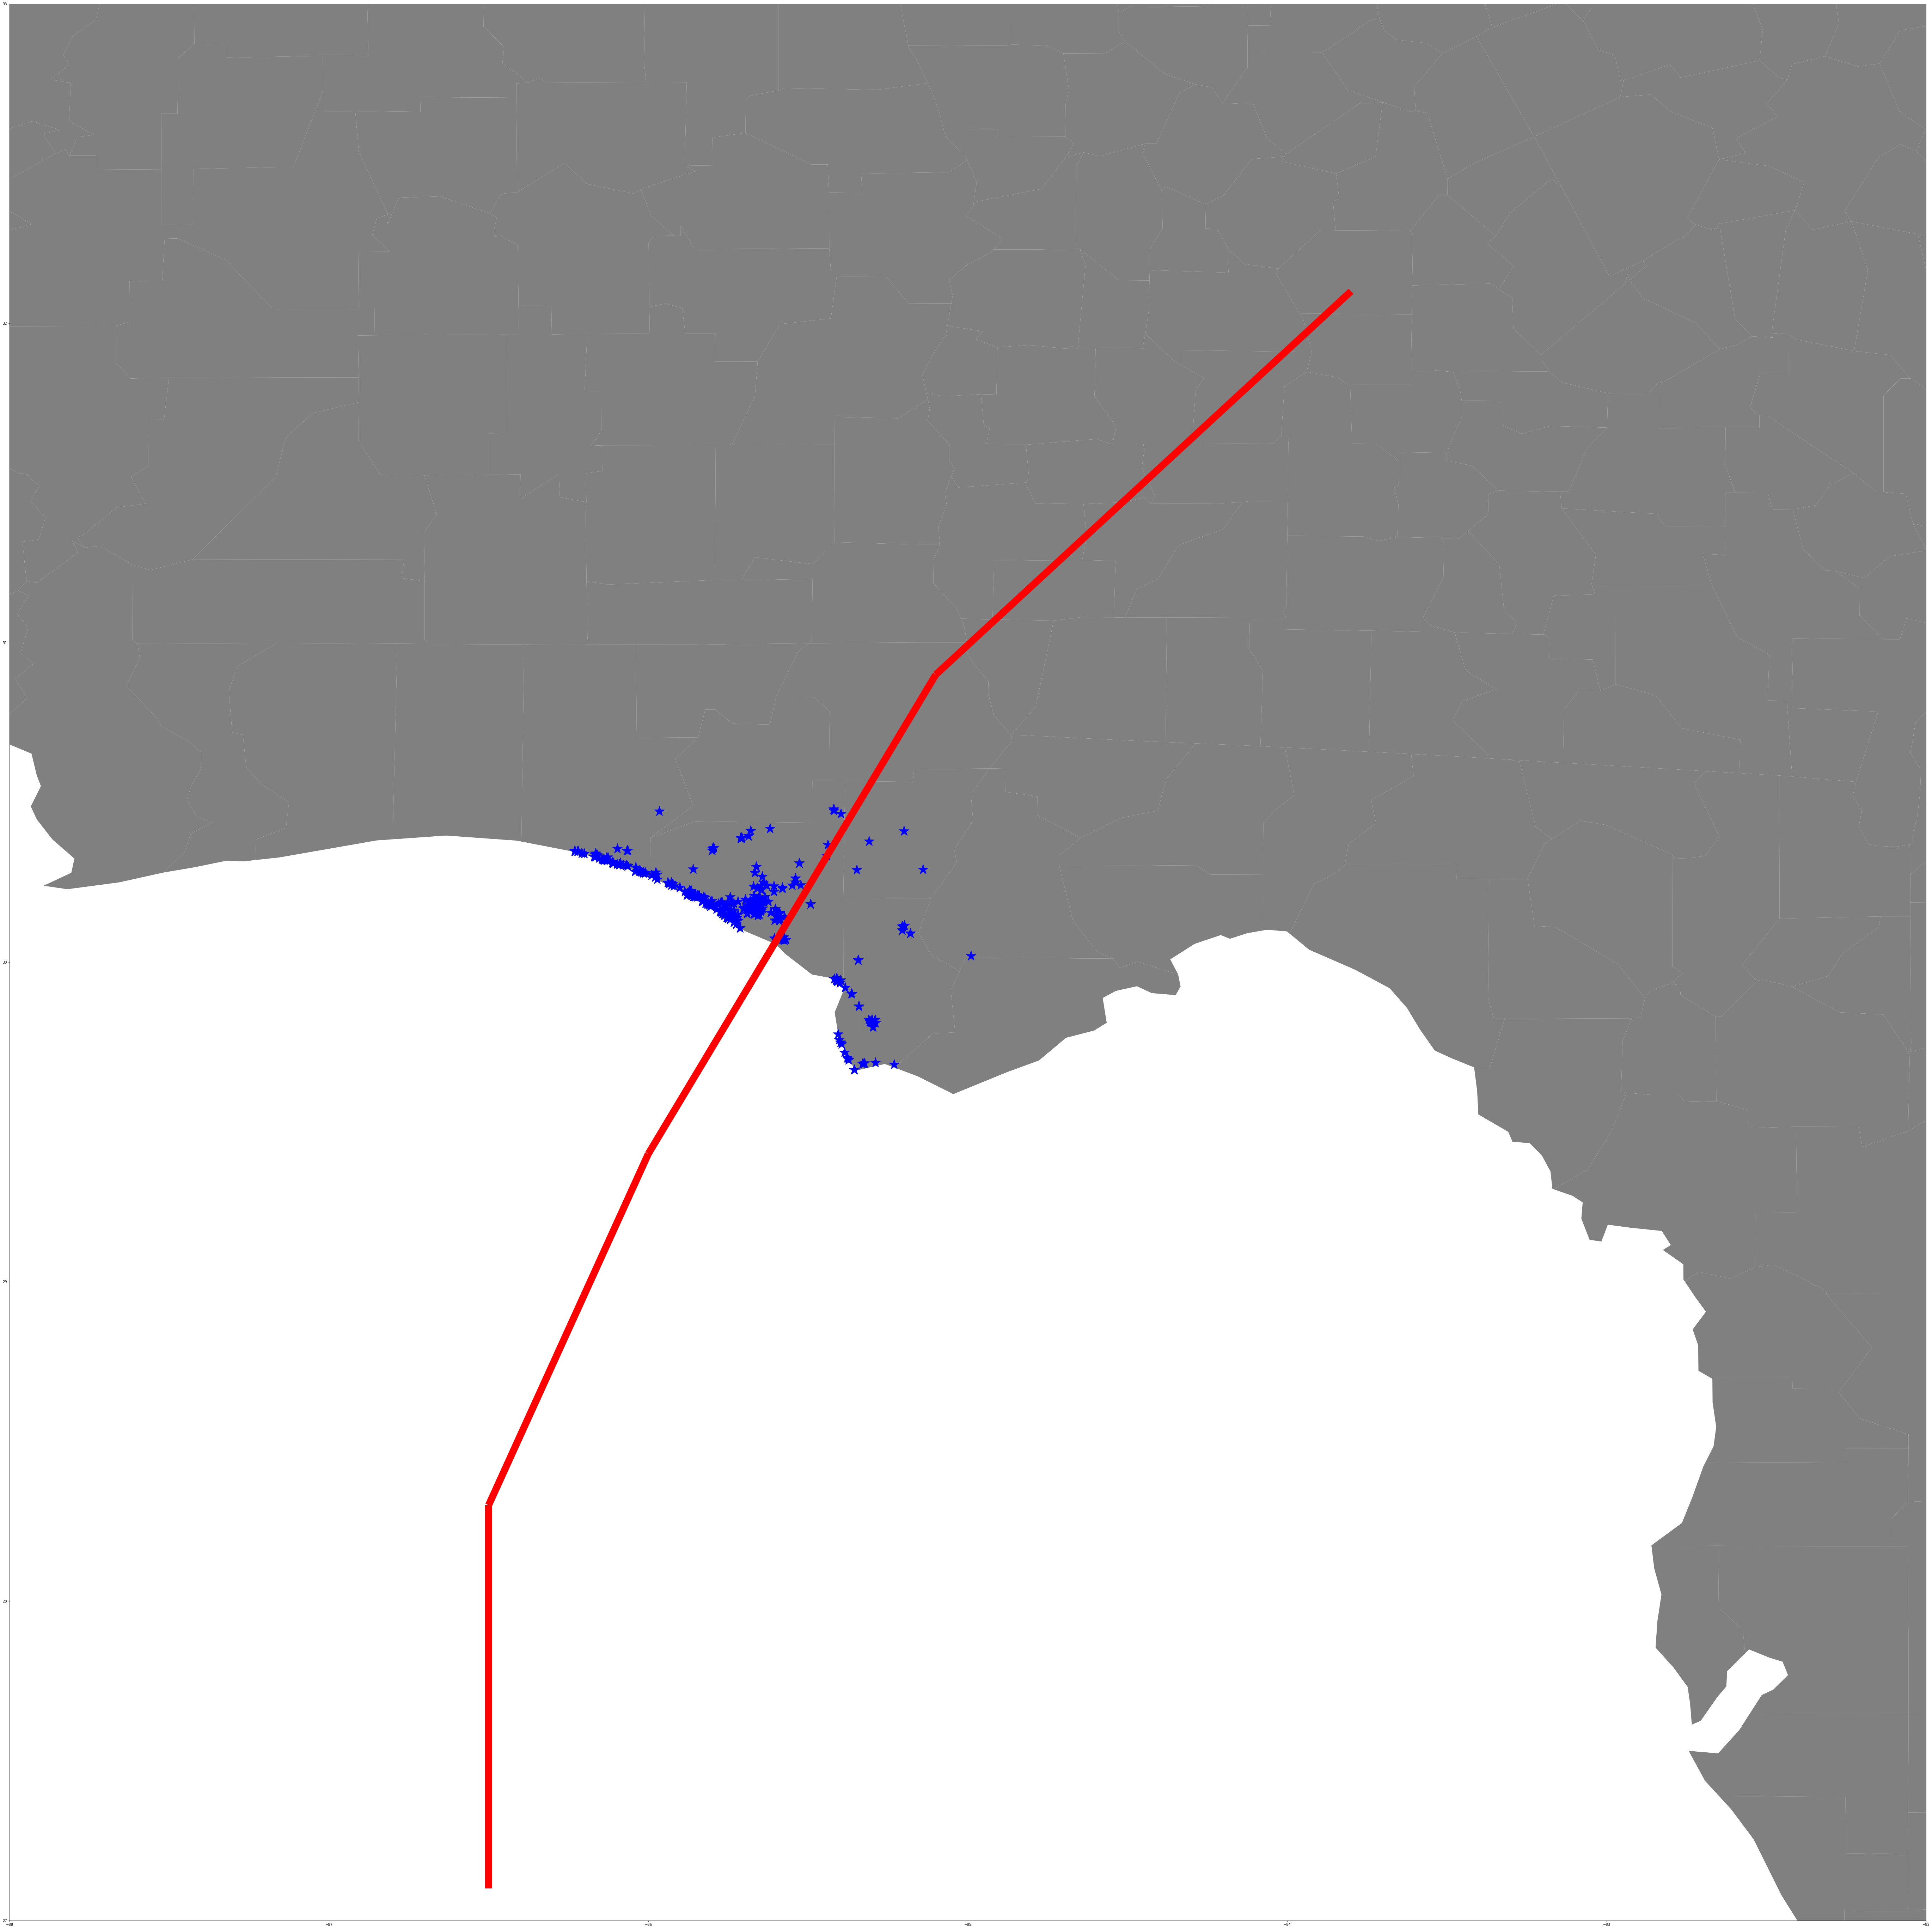

In [128]:
fig, ax = plt.subplots(figsize = (100,100))
usa.plot(ax = ax, color = 'gray')

tweets_geo_df.geometry.plot(marker='*', color='blue', markersize=900, 
                            ax=ax, label = 'Tweet Loc')

hurricane_path_gdf.geometry.plot(color='red', ax=ax, label='Hurricane Michael', lw=20)

plt.xlim(-88, -82)
plt.ylim(27,33)

(29, 31)

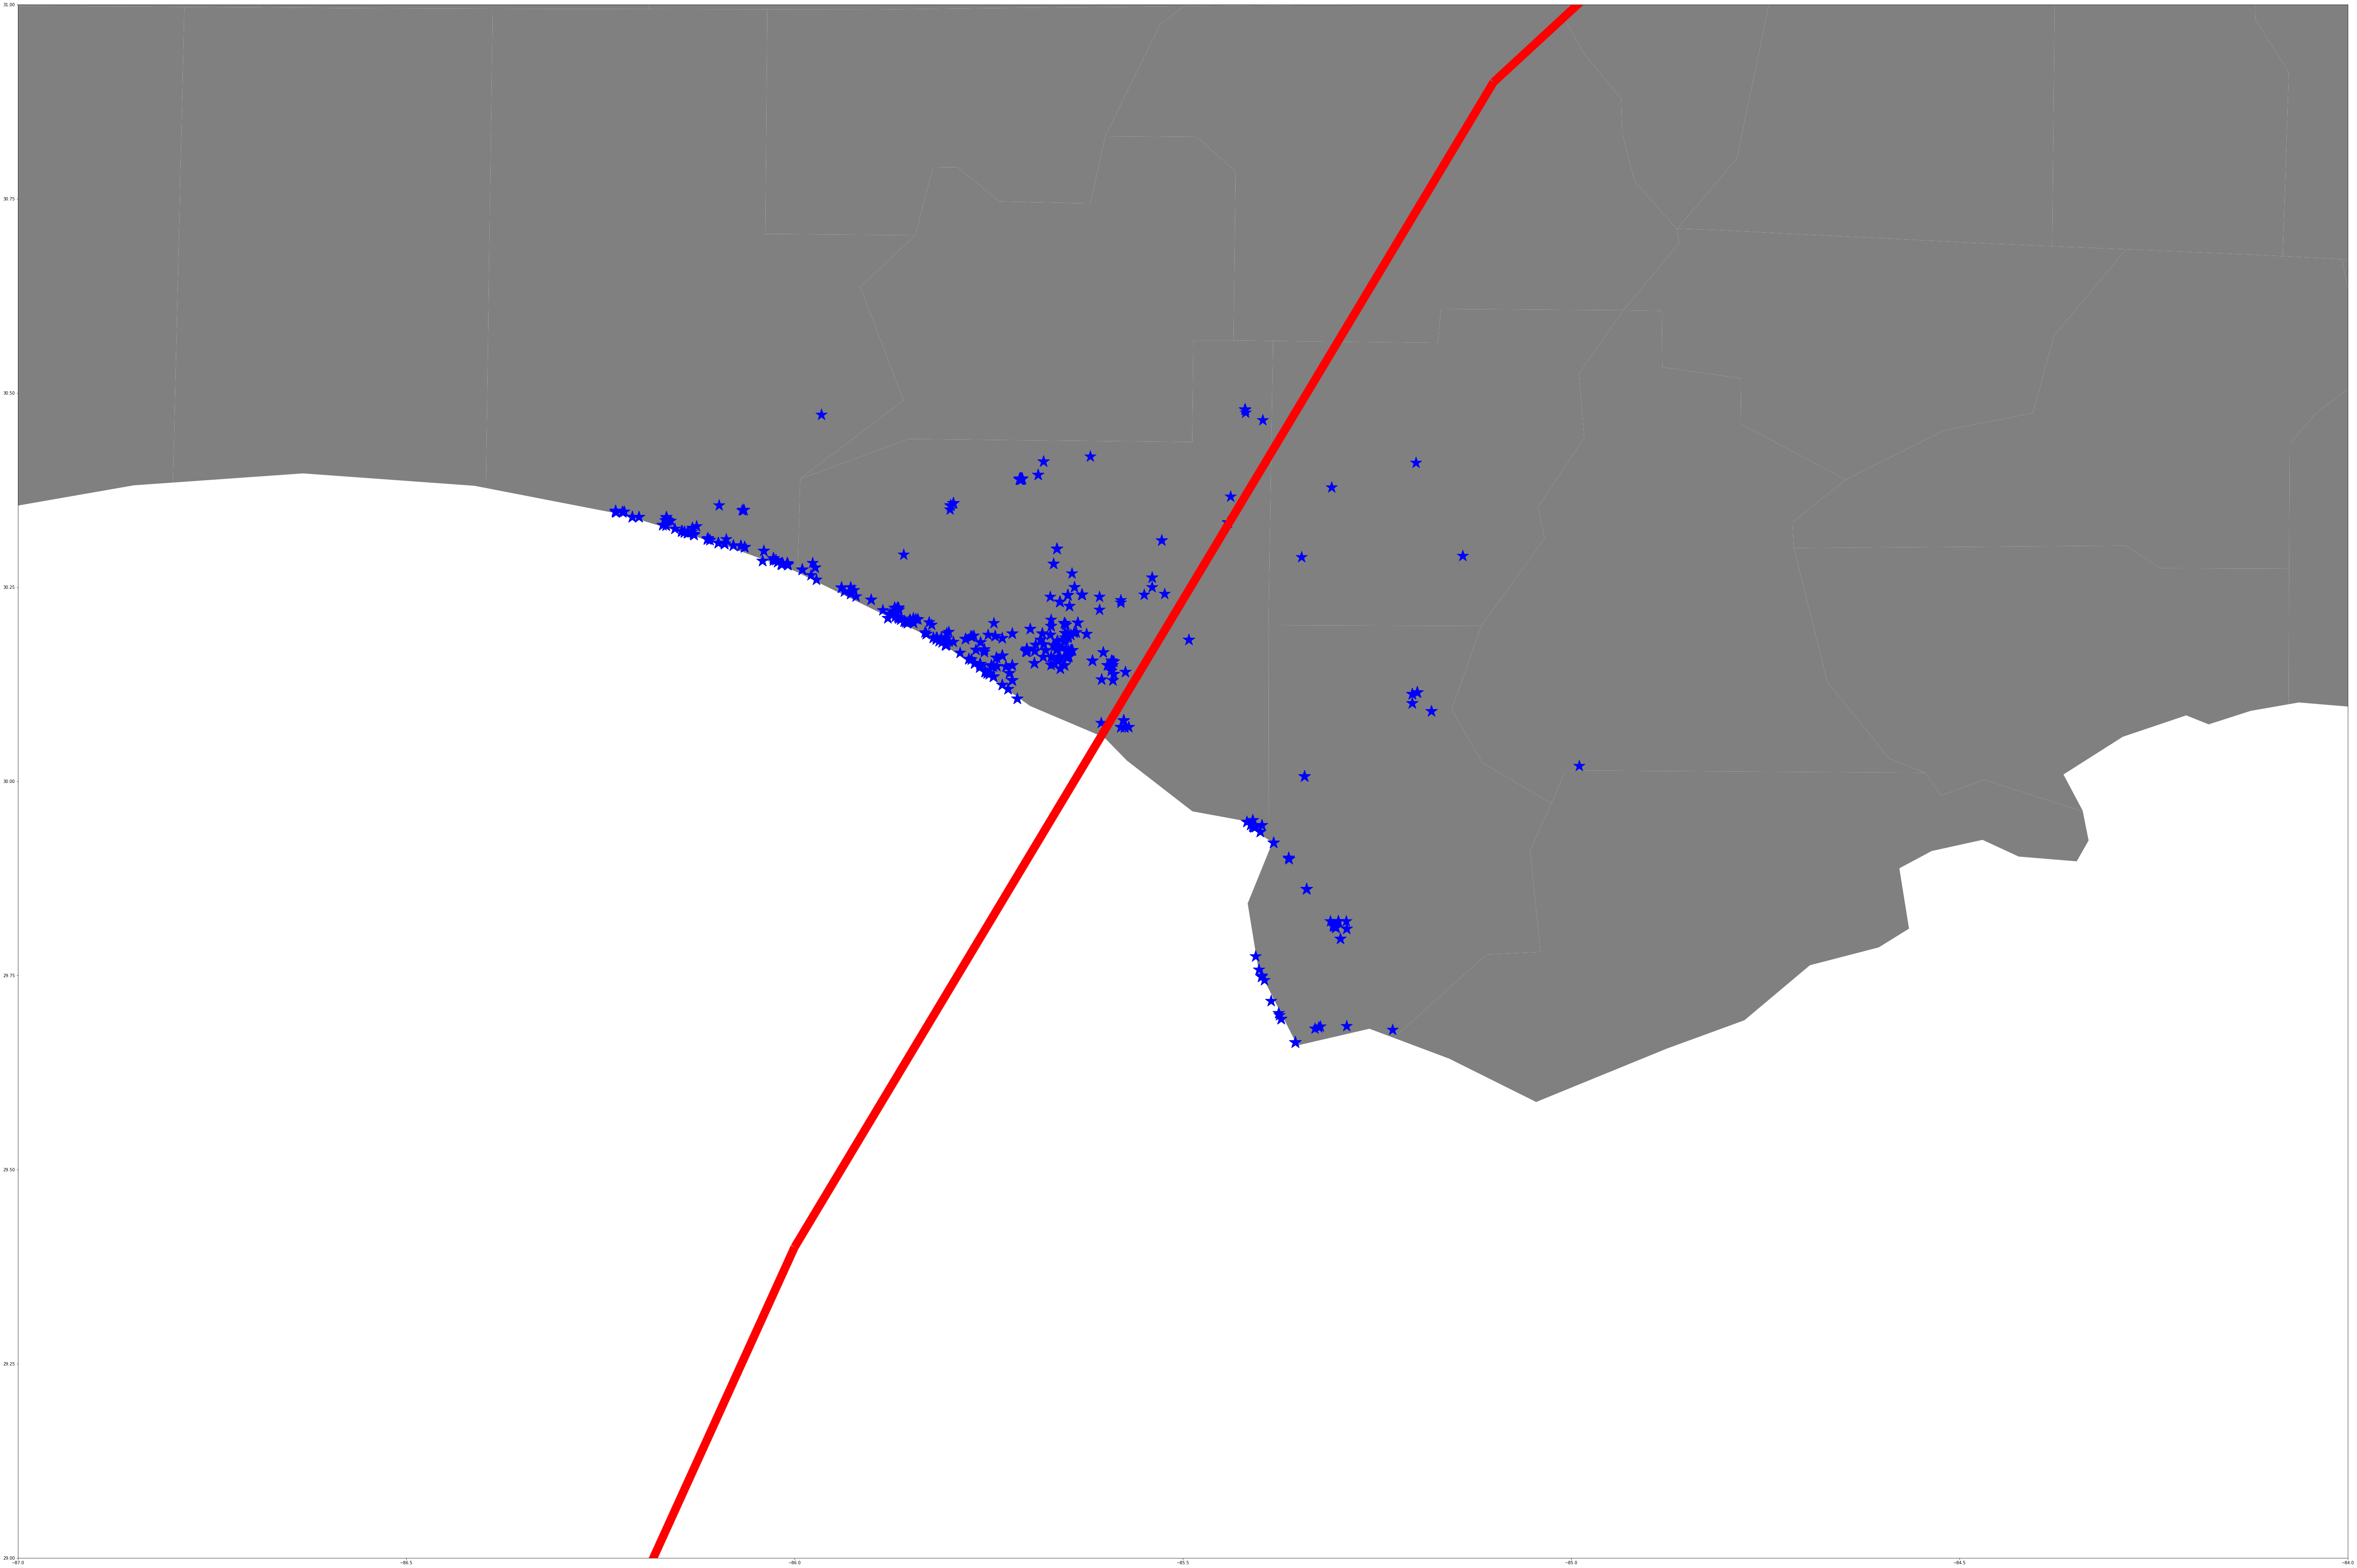

In [127]:
fig, ax = plt.subplots(figsize = (100,100))
usa.plot(ax = ax, color = 'gray')

tweets_geo_df.geometry.plot(marker='*', color='blue', markersize=900, 
                            ax=ax, label = 'Tweet Loc')

hurricane_path_gdf.geometry.plot(color='red', ax=ax, label='Hurricane Michael', lw=20)

plt.xlim(-87, -84)
plt.ylim(29,31)